In [2]:
import numpy as np
import pandas as pd
import re
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from frbpoppy import CosmicPopulation, Survey, SurveyPopulation, unpickle, merge_pop
from frbpoppy.tns import get_chimefrb_catalog1

import warnings
warnings.filterwarnings('ignore')

## pops with new gain

In [4]:
for model in ['sfr']:
    for i in range(50):
        exec("surv_pop_%s_%s=unpickle('mcmc/surveyed_' + model + '_' + str(i))"%(model.replace('.', ''),i))
for model in ['sfr']:
    exec("surv_pop_%s=merge_pop(*[eval('surv_pop_' + model + '_' + str(i)) for i in range(50)])"%model)

## pops with old gain

In [5]:
for model in ['sfr']:
    for i in range(50):
        exec("surv_pop_%s_%s_old=unpickle('mcmc/old_gain/surveyed_' + model + '_' + str(i))"%(model.replace('.', ''),i))
for model in ['sfr']:
    exec("surv_pop_%s_old=merge_pop(*[eval('surv_pop_' + model + '_' + str(i) + '_old') for i in range(50)])"%model)

## Loading catalog

In [16]:
chime_catalog_1 = get_chimefrb_catalog1(repeater=False)

## N(>x)

In [8]:
def Nplus(pop, x, plot_type, normalize=False):
    
    if plot_type=='luminosity':
        if normalize==False:
            num = len(pop.lum_bol[pop.lum_bol>x])
        else:
            num = len(pop.lum_bol[pop.lum_bol>x])/len(pop.lum_bol)
    elif plot_type=='fluence':
        if normalize==False:
            num = len(pop.fluence[pop.fluence>x])
        else:
            num = len(pop.fluence[pop.fluence>x])/len(pop.fluence[pop.fluence>0])
    elif plot_type=='snr':
        if normalize==False:
            num = len(pop.snr[pop.snr>x])
        else:
            num = len(pop.snr[pop.snr>x])/len(pop.snr)
    return num

## Fitting curve

In [9]:
def func(x, *params):
    
    k, C = params
    C = 10**C
    y = C*x**k
    return y

# Fig.12

In [10]:
surv_pop000 = unpickle('mcmc/sfr_sn0000001')

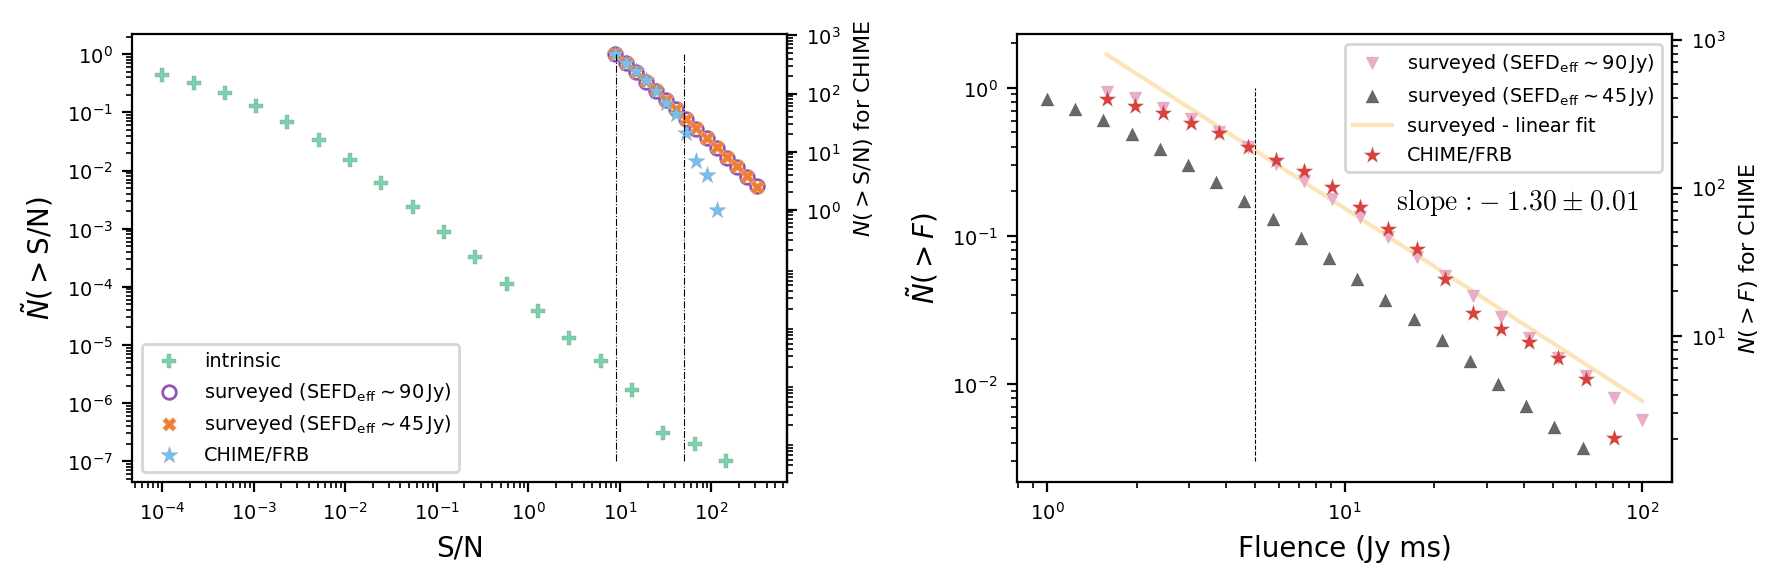

In [13]:
nbins = 20
nbins2 = 15
bins = np.logspace(-4, 2.5, nbins)
bins2 = np.logspace(0.95, 2.5, nbins2)

NUM_int = np.zeros(nbins)
NUM_obs_new = np.zeros(nbins2)
NUM_obs_old = np.zeros(nbins2)
NUM_chime = np.zeros(nbins2)
for i in range(nbins):
    NUM_int[i] = Nplus(surv_pop000.frbs, bins[i], plot_type='snr', normalize=True)
for i in range(nbins2):
    NUM_obs_new[i] = Nplus(surv_pop_sfr.frbs, bins2[i], plot_type='snr', normalize=True)
    NUM_obs_old[i] = Nplus(surv_pop_sfr_old.frbs, bins2[i], plot_type='snr', normalize=True)
    NUM_chime[i] = Nplus(chime_catalog_1, bins2[i], 'snr', normalize=True)

def frac_to_total(x):
    
    return x*len(chime_catalog_1)

def total_to_frac(x):
    
    return x/(len(chime_catalog_1))

fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(9,3), dpi=200)

#plt.subplot(1, 2, 1)
#plt.scatter(bins, NUM_int, label='intrinsic', marker='+', s=20, linewidths=1, color='#78D3AC')
ax1.scatter(bins, NUM_int, label='intrinsic', marker='P', s=24, facecolor='#78D3AC', edgecolor='#7E7E7E', linewidth=0.1)
ax1.scatter(bins2, NUM_obs_new, label='surveyed ($\mathrm{SEFD}_\mathrm{eff}\sim 90\,\mathrm{Jy}$)', \
            marker='o', s=24, linewidths=1, edgecolor='#9355B0', facecolor='white')#C7A3B5
ax1.scatter(bins2, NUM_obs_old, label='surveyed ($\mathrm{SEFD}_\mathrm{eff}\sim 45\,\mathrm{Jy}$)', \
            marker='X', s=24, facecolor='#EF7E33', edgecolor='#FAAF78', linewidth=0.2)#FFC101#E57259#EF7F51#7E7E7E
ax1.scatter(bins2, NUM_chime, label='CHIME/FRB', \
            marker='*', s=40, facecolor='#74C1F0', edgecolor='#7E7E7E', linewidth=0.1)
ax1.set_xlabel('S/N')
ax1.set_ylabel('$\\tilde{N}(>\mathrm{S}/\mathrm{N})$')
ax1.set_xscale('log')
ax1.set_yscale('log')
#ax1.set_xticklabels(fontsize=7)
#ax1.set_yticklabels(fontsize=7)
ax1.tick_params(axis='x', labelsize=7)
ax1.tick_params(axis='y', labelsize=7)
#plt.yticks(np.logspace(-6, 0, 7), fontsize=8)
ax1.vlines(9, 1e-7, 1, linestyles='dashdot', linewidth=0.4, color='k')
ax1.vlines(50, 1e-7, 1, linestyles='dashdot', linewidth=0.4, color='k')
#plt.xlim(1e-4, 1e3)
#plt.ylim(1e-7, 2)
ax1.legend(fontsize='x-small')
#plt.title('N(>L)-L')
secax_y1 = ax1.secondary_yaxis('right', functions=(frac_to_total, total_to_frac))
secax_y1.set_ylabel('$\qquad\qquad\qquad\qquad\qquad\qquad N(>\mathrm{S}/\mathrm{N})$ for CHIME', size=8)#_\mathrm{CHIME}
secax_y1.tick_params(labelsize=7)
secax_y1.set_yticks([1, 10, 100, 1000])


#plt.subplot(1, 2, 2)
bins0 = np.logspace(0, 1.8, nbins)

bins = np.logspace(0.2, 2, nbins)
NUM_obs_new = np.zeros(nbins)
NUM_obs_old = np.zeros(nbins)
NUM_chime = np.zeros(nbins)
for i in range(nbins):
    NUM_obs_new[i] = Nplus(surv_pop_sfr.frbs, bins[i], 'fluence', normalize=True)
    NUM_obs_old[i] = Nplus(surv_pop_sfr_old.frbs, bins0[i], 'fluence', normalize=True)
    NUM_chime[i] = Nplus(chime_catalog_1, bins[i], 'fluence', normalize=True)
ax2.scatter(bins, NUM_obs_new, label='surveyed ($\mathrm{SEFD}_\mathrm{eff}\sim 90\,\mathrm{Jy}$)', \
            marker='v', s=22, facecolor='#EBACCA', edgecolor='#A9A9A9', linewidth=0.05, zorder=2)
ax2.scatter(bins0, NUM_obs_old, label='surveyed ($\mathrm{SEFD}_\mathrm{eff}\sim 45\,\mathrm{Jy}$)', \
            marker='^', s=22, facecolor='#686868', edgecolor='k', linewidth=0.05, zorder=2)
ax2.plot(bins, func(bins, -1.30, 0.485), color='#FBE5B8', label='surveyed - linear fit', zorder=1)
ax2.scatter(bins, NUM_chime, label='CHIME/FRB', marker='*', s=40, facecolor='#D9423C', edgecolor='#A9A9A9', linewidth=0.05, zorder=3)
ax2.set_xlabel('Fluence (Jy ms)')
ax2.set_ylabel('$\\tilde{N}(>F)$')
ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.tick_params(axis='x', labelsize=7)
ax2.tick_params(axis='y', labelsize=7)

ax2.legend(fontsize='x-small', loc='upper right')
ax2.text(15, 0.15, '$\mathrm{slope:} -1.30\pm 0.01$', usetex=True)

ax2.vlines(5, 3e-3, 1, linestyles='dashed', linewidth=0.4, color='k')
secax_y2 = ax2.secondary_yaxis('right', functions=(frac_to_total, total_to_frac))
secax_y2.set_ylabel('$N(>F)$ for CHIME', size=8)#_\mathrm{CHIME}
secax_y2.tick_params(labelsize=7)

plt.tight_layout()
plt.savefig('cumulative_SN_fluence.pdf', transparent=True, bbox_inches='tight')#

# Fig.13

In [22]:
def pop_sfr():
    
    pop = CosmicPopulation.complex(1e7, mute=True)
    pop.set_dist(model='sfr', z_max=1.5)
    pop.set_si(model='constant', value=-1.5)
    pop.set_lum(model='powerlaw', low=10**41.0, high=10**46.0, power=li)
    pop.set_w(model='lognormal', mean=10**log_w_mean, std=w_std)
    pop.set_dm_igm(model='ioka', slope=dm_igm_slope)
    pop.set_dm_host(model='lognormal', mean=dm_host_mean, std=dm_host_std)
    pop.generate()
    return pop

In [15]:
'''li = -1.58
log_w_mean = -0.50
w_std = 1.65
dm_igm_slope = 840
dm_host_mean = 490
dm_host_std = 520

pop0 = pop_sfr()
pop0.name = 'sfr_zmax1.5'
pop0.save()
'''
pop0 = unpickle('mcmc/sfr_zmax1.5')

In [14]:
surv_pop3e44_079 = unpickle('mcmc/surveyed_sfr_3e44_079')

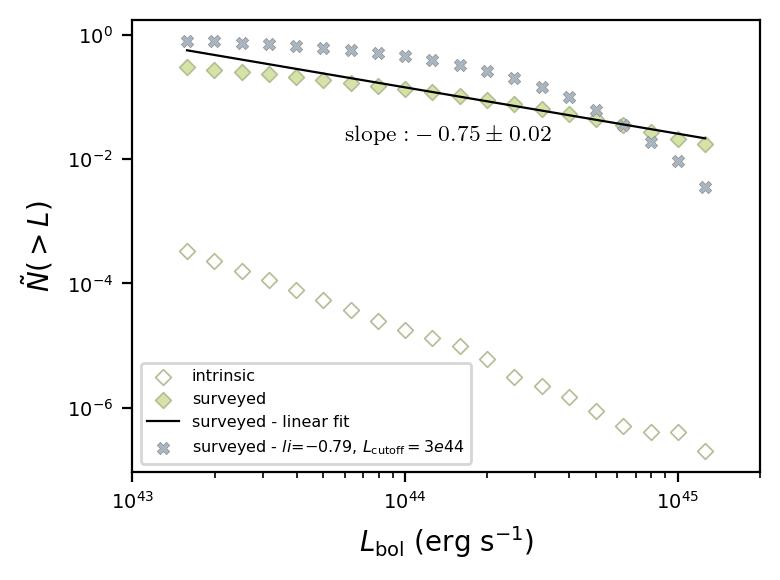

In [136]:
nbins = 20
bins_1 = np.logspace(43.2, 45.1, nbins)
bins_fit = np.logspace(44, 45.2, nbins)
NUM_int = np.zeros(nbins)
NUM_obs = np.zeros(nbins)
NUM_obs_fit = np.zeros(nbins)
for i in range(nbins):
    NUM_int[i] = Nplus(pop0.frbs, bins_1[i], 'luminosity', normalize=True)
    NUM_obs[i] = Nplus(surv_pop_sfr.frbs, bins_1[i], 'luminosity', normalize=True)
    NUM_obs_fit[i] = Nplus(surv_pop_sfr.frbs, bins_fit[i], 'luminosity', normalize=True)

NUM_3e44_079_obs = np.zeros(nbins)
for i in range(nbins):
    NUM_3e44_079_obs[i] = Nplus(surv_pop3e44_079.frbs, bins_1[i], 'luminosity', normalize=True)
    
guess = [-0.75, 32]
popt, pcov = curve_fit(func, bins_fit, NUM_obs_fit, p0=guess)
fit = func(bins_fit, *popt)

plt.figure(figsize=(4,3), dpi=200)
plt.scatter(bins_1, NUM_int, label='intrinsic', s=16, marker='D', edgecolor='#B3BC95', facecolor='white', linewidth=0.6)
plt.scatter(bins_1, NUM_obs, label='surveyed', s=16, marker='D', edgecolor='#B3BC95', facecolor='#D5E4A6', linewidth=0.6)#A9B6C1
plt.plot(bins_1, func(bins_1, -0.746, 31.98), label='surveyed - linear fit', color='k', linewidth=0.8)
plt.scatter(bins_1, NUM_3e44_079_obs, label='surveyed - $li$=$-0.79$, $L_\mathrm{cutoff}=3e44$', s=20, marker='X', edgecolor='#7E7E7E', facecolor='#A9B6C1', linewidth=0.2)
#\\times 10^{44}\mathrm{erg}\mathrm{s}^{-1}
plt.xlabel('$L_\mathrm{bol}$ (erg s$^{-1}$)')
plt.ylabel('$\\tilde{N}(>L)$')
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlim(1e43, 2e45)
plt.text(6e43, 0.02, '$\mathrm{slope:} -0.75 \pm 0.02$', fontsize=8, usetex=True)
plt.legend(loc='lower left', fontsize='xx-small')
#plt.title('N(>L)-L')
plt.tight_layout()
plt.savefig('cumulative_luminosity.pdf', transparent=True, bbox_inches='tight')